## Linear Model Assumptions

Some of the linear regression model assumptions are:

- **Linearity**: The mean values of the outcome variable for each increment of the predictor(s) lie along a straight line. In other words, there is a linear relationship between predictors and target.

- **No perfect multicollinearity**: There should be no perfect linear relationship between two or more of the predictors. 

- **Normally distributed errors**: the residuals are random, normally distributed with a mean of 0.

- **Homoscedasticity**: At each level of the predictor variable(s), the variance of the residual terms should be constant.

If the **error terms, or residuals** follow a **normal distribution** with a mean of zero(Q-Q plots), and are **homoscedastic** (residuals plots), the model does a good job. Linear regression can be assessed by **scatter-plots** and **residuals plots**! Multi-colinearity can be assessed by **correlation matrices**! If the assumptions are not met, we can do **mathematical transformation** of the variables or **discretisation**!

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats  # for the Q-Q plots
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error  # to evaluate the regression model

In [78]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target  # add the target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [79]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Build a linear model 

**First split into train and test data, using 3 variables of choice: LSTAT, RM and CRIM**

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

**Scale the features!

In [44]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

**Build a linear model! Instantiate! Train! Make predictions! mse!**

In [45]:
linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train) # train the model
print('Train set')
pred = linreg.predict(scaler.transform(X_train)) # make predictions! mse!
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 28.603232128198893
Test set
Linear Regression mse: 33.2000629530844



## Calculate the residuals

**Calculate the residuals!**

In [46]:
error = y_test - pred

## Test residuals normality

**Make a histogram to determine if the residuals are normally distributed with mean value at 0**

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

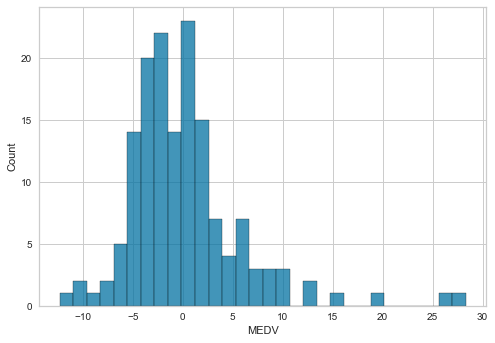

In [47]:
sns.histplot(error, bins=30)

We see that the residuals show a **fairly normal distribution** centered at 0. **Not perfect**, **some skew towards the left**, with a **few higher unusual values towards the right** of the distribution.

**Visualize residuals distribution with a Q-Q plot. If the residuals are **normally distributed the dots should adjust to the 45 degree line!**

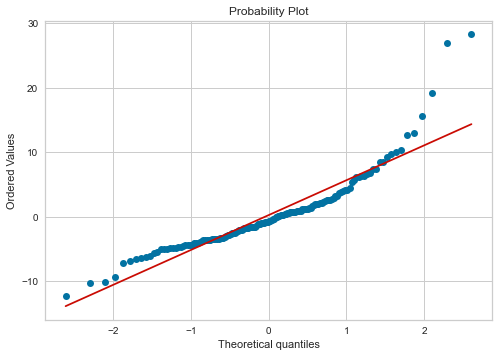

In [48]:
stats.probplot(error, dist="norm", plot=plt)
plt.show()

From the Q-Q plot we see more easily how the **residuals deviate from the red line towards the ends** of the distribution, thus, they are **not normally distributed**.

## Homoscedasticity

**Homoscedasticity (homogeneity of variance)** implies that at each level of the predictor variable(s), the variance of the residual terms should be constant. The error term (noise or random disturbance) is the same across all the independent variables! If the distribution of the residuals is homogeneous across the variable values, then the variables are homoscedastic.

There are other tests for homoscedasticity: **Residuals plot, Levene’s test, Barlett’s test, Goldfeld-Quandt Test!**

**Plot the residuals vs LSTAT!**

Text(0, 0.5, 'Residuals')

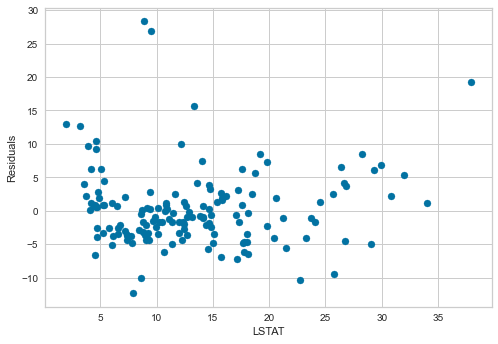

In [49]:
plt.scatter(x=X_test['LSTAT'], y=error)
plt.xlabel('LSTAT')
plt.ylabel('Residuals')

The residuals seem fairly homogeneously distributed across the values of LSTAT.

**Plot the residuals vs RM!**

Text(0, 0.5, 'Residuals')

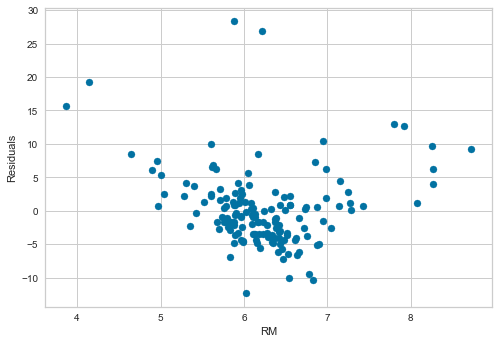

In [50]:
plt.scatter(x=X_test['RM'], y=error)
plt.xlabel('RM')
plt.ylabel('Residuals')

For this variable, the residuals do not seem to be homogeneously distributed across the values of RM. In fact, low and high values of RM show higher error terms.

**Plot the residuals vs CRIM !**

Text(0, 0.5, 'Residuals')

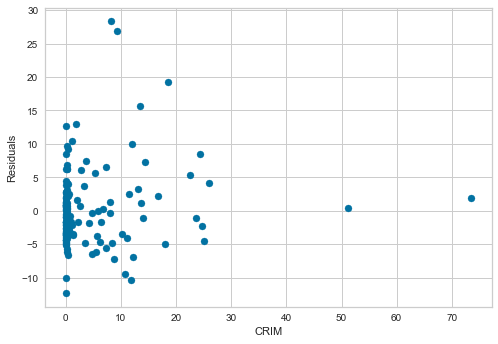

In [51]:
plt.scatter(x=X_test['CRIM'], y=error)
plt.xlabel('CRIM')
plt.ylabel('Residuals')

Most values of CRIM are skewed towards the left, so it is hard to say if the residuals show the same variance for all values of CRIM, because we have very few data points for CRIM when its values are high.

## Automating Residual analysis with Yellowbrick

**Yellowbricks allows you to visualise the residuals of the models after fitting a linear regression!**

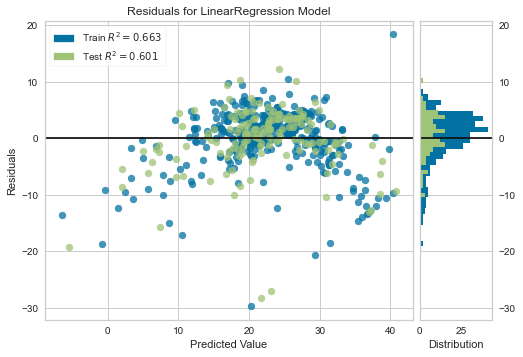

In [52]:
from yellowbrick.regressor import ResidualsPlot
linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)
visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

**On the right**, we have **the distribution of the residuals** in the train and test sets. We see that it is **not perfectly centered at 0**.

**On the left**, we have the **residuals vs the predicted value**, we also see that the **variance is not constant**. **Towards the extremes of the predictions, the model is under-estimating the outcome** (most residuals are negative). And **towards the center** of the predictions, the model is **over-estimating the outcome**. So the residuals variance is not constant for all values.

## Transform the data to improve model fit*

**Apply the box-cox transformation to the variables!**

In [53]:
import scipy.stats as stats
boston['LSTAT'], _ = stats.boxcox(boston['LSTAT'])
boston['CRIM'], _ = stats.boxcox(boston['CRIM'])
boston['RM'], _ = stats.boxcox(boston['RM'])
X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

**Let's scale the features**

In [54]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# specify the model**

**Build a new model using the transformed variables**!

In [55]:
linreg = LinearRegression()  # specify the model
linreg.fit(scaler.transform(X_train), y_train)  # fit the model
print('Train set')  # make predictions
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
print('Test set')  # make predictions and calculate mse over the test!
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 25.020138527672213
Test set
Linear Regression mse: 29.70979354458992



### Calculate residuals

**Calculate the residuals!**

In [56]:
error = y_test - pred

### Residual normality

**Make a histogram to determine if the residuals are normally distributed!**

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

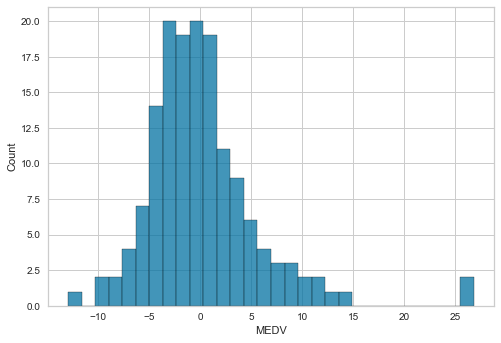

In [57]:
sns.histplot(error, bins=30)

**Visualize residual distribution with a Q-Q plot. If the residuals are normally distributed the dots should adjust to the 45 degree line!**

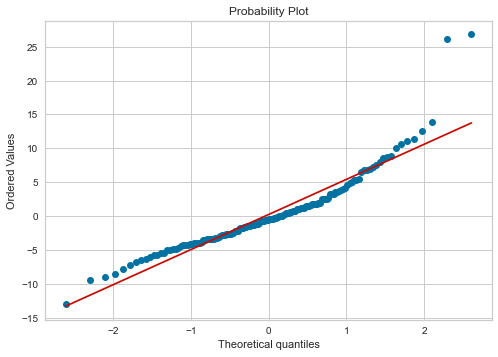

In [58]:
stats.probplot(error, dist="norm", plot=plt)
plt.show()

We see an improvement: the residuals are now "more" normally distributed.

**Do the analysis with yellowbrick!**

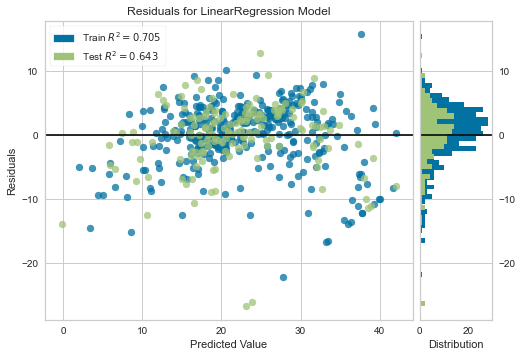

In [59]:
from yellowbrick.regressor import ResidualsPlot
linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)
visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

We can see a **noticeable improvement in the distribution of the residuals**, now better centered at 0, and with a more even variance across all values of the prediction. Also we can **plot the residuals vs the transformed variables** to determine homoscedasticity.

**NOTE** If we transformed the target as well, the model performance would improve even further!**

## Testing other model assumptions

If we want to better understand the relationships between our variables among themselves and the outcome, we can go ahead and check the **linear relationship and colinearity**.

**If the assumptions are met, how the plots should look like? We can see by creating a normally distributed data frame!!**

In [60]:
np.random.seed(29) # for reproducibility
n = 200
x = np.random.randn(n)
y = x * 10 + np.random.randn(n) * 2
toy_df = pd.DataFrame([x, y]).T
toy_df.columns = ['x', 'y']
toy_df.head()

,x,y
0,-0.417482,-1.271561
1,0.706032,7.990600
2,1.915985,19.848687
3,-2.141755,-21.928903
4,0.719057,5.579070


## Linear relationship

We evaluate linear assumption with scatter plots and residual plots. Scatter plots plot the change in the dependent variable y with the independent variable x.

### Scatter plots

We see how the plot looks like when there is a **linear relationship!** **Order 1** indicates that we want seaborn to estimate a **linear model!**

Text(0.5, 22.960000000000022, 'Independent variable')

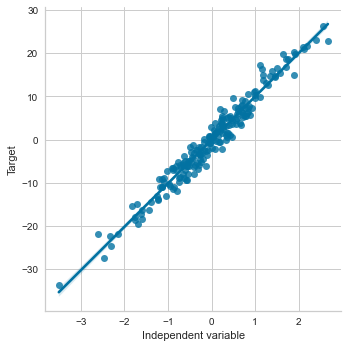

In [61]:
sns.lmplot(x="x", y="y", data=toy_df, order=1)
plt.ylabel('Target')
plt.xlabel('Independent variable')

Make a **scatter plot** for the boston house price dataset, already transformed! Plot **LAST (% lower status of the population) vs MEDV (median value of the house)**

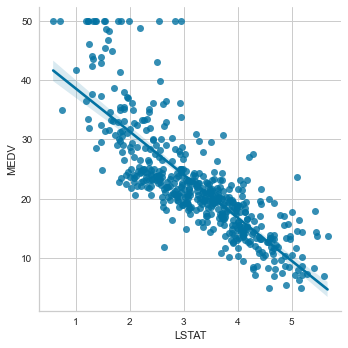

In [62]:
sns.lmplot(x="LSTAT", y="MEDV", data=boston, order=1)

The relationship between **LSTAT and MEDV** is **fairly linear** apart from a few values around the minimal values of LSTAT, towards the top left side of the plot.

**Plot RM (average number of rooms per dwelling) vs MEDV (median value of the house)!**

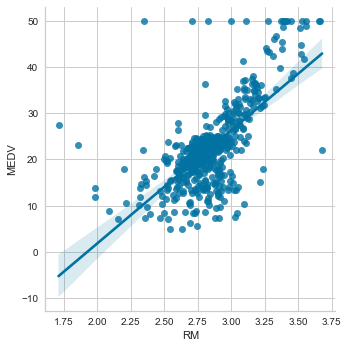

In [63]:
sns.lmplot(x="RM", y="MEDV", data=boston, order=1)

The relationship between the target and transformed RM is **not very linear**. We could consider, transforming this variable further, removing the variable from the model, or using a non-linear model to predict MEDV from RM.

**Plot CRIM (per capita crime rate by town) vs MEDV (median value of the house)!**

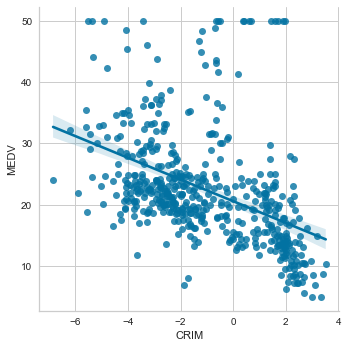

In [64]:
sns.lmplot(x="CRIM", y="MEDV", data=boston, order=1)

The relationship is also not perfectly linear between CRIM and MEDV.

We can also **compare the original relationship of LSTAT, RM and CRIM with the target**. Even though the relationships after the transformation are not perfectly linear, you will notice that it went a bit in that direction after the transformation.

### residual plots (errors)

Another thing that we can do to determine whether there is a linear relationship between the variable and the target is to evaluate the distribution of the errors, or the residuals. The residuals refer to the difference between the predictions and the real value of the target. It is performed as follows:

1) make a linear regression model using the desired variables (X)

2) obtain the predictions 

3) determine the error (True house price - predicted house price)

4) observe the distribution of the error.

If the house price, in this case MEDV, is linearly explained by the variables we are evaluating, then the error should be random noise, and should typically follow a normal distribution centered at 0. We expect to see the error terms for each observation lying around 0.

We will do this first, for the simulated data, to become familiar with how the plots should look like. Then we will do the same for LSTAT and then, we will transform LSTAT to see how transformation affects the residuals and the linear fit.

**Note**

This is a bit of an over-kill, if what we are trying to do is to predict an outcome from predictor variables. However, you may want to do this, to better understand the relationships between your variables and the target.

Step 1: In the simulated data, **make a linear model**! Step 2: **Make the predictions**! step 3: **Calculate the residuals!**

Text(0, 0.5, 'Real value')

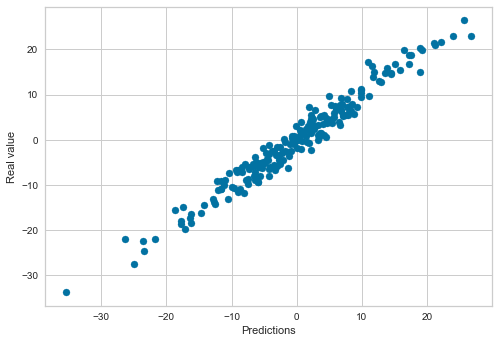

In [67]:
linreg = LinearRegression()  # Step 1
linreg.fit(toy_df['x'].to_frame(), toy_df['y'])  # fit the model
pred = linreg.predict(toy_df['x'].to_frame())  # step 2
error = toy_df['y'] - pred  # step 3: calculate the residuals
plt.scatter(x=pred, y=toy_df['y'])  # plot predicted vs real
plt.xlabel('Predictions')
plt.ylabel('Real value')

The model makes good predictions. The predictions are quite aligned with the real value of the target.

**Step 4: Observe the **distribution of the errors**! **Residuals plot**! If the relationship is **linear**, the noise should be random, centered around zero, and follow a **normal distribution**! Plot the **error terms vs the independent variable x**, error values should be around 0 and homogeneously distributed!

Text(0.5, 0, 'Independent variable x')

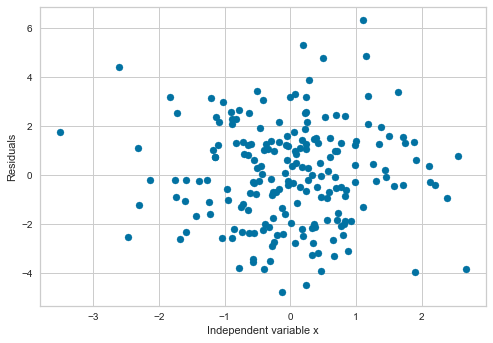

In [68]:
plt.scatter(y=error, x=toy_df['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')

The errors are distributed around 0, as expected.

**Step 4: observe the distribution of the errors! Plot a histogram of the residuals! A gaussian distribution centered around 0 !**

Text(0.5, 0, 'Residuals')

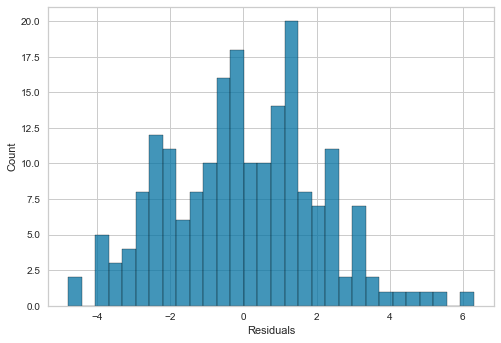

In [69]:
sns.histplot(error, bins=30)
plt.xlabel('Residuals')

The errors adopt a **Gaussian distribution** and it is **centered around 0**. So **it meets the assumptions**, as expected.

**Do the same for LSTAT (remember that we already transformed this variable)!**

Text(0, 0.5, 'MEDV')

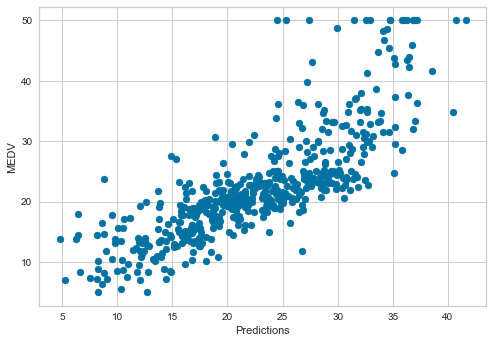

In [70]:
linreg = LinearRegression()  # call the linear model from sklearn
linreg.fit(boston['LSTAT'].to_frame(), boston['MEDV'])  # fit the model
pred = linreg.predict(boston['LSTAT'].to_frame())  # make the predictions
error = boston['MEDV'] - pred  # calculate the residuals
plt.scatter(x=pred, y=boston['MEDV'])  # plot predicted vs real
plt.xlabel('Predictions')
plt.ylabel('MEDV')

There is a relatively good fit for most of the predictions, but the model does not predict very well towards the highest house prices. For high house prices, the model under-estimates the price.

**Residuals plot! if the relationship is linear, the noise should be random, centered around zero, and follow a normal distribution!**

Text(0.5, 0, 'LSTAT')

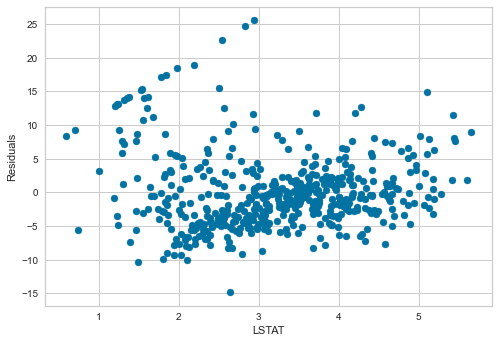

In [71]:
plt.scatter(y=error, x=boston['LSTAT'])
plt.ylabel('Residuals')
plt.xlabel('LSTAT')

The residuals are not really centered around zero. And the errors are not homogeneously distributed across the values of LSTAT. Low and high values of LSTAT show higher errors. 

The relationship could be improved.

**Plot a histogram of the residuals** they should follow a **gaussian distribution!**

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

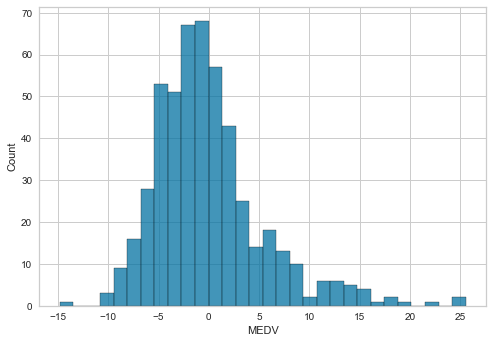

In [72]:
sns.histplot(error, bins=30)

The residuals are not centered around zero, and the distribution is not totally Gaussian.

## Multicolinearity

To determine **co-linearity**, we evaluate the correlation of all the independent variables in the dataframe.

**Capture features in a list**

In [73]:
features = boston_dataset.feature_names

**Calculate the correlations using pandas corr and we round the values to 2 decimals! Then plot the correlation matrix using heatmap! annot = True to print the correlation values inside the square!**

<AxesSubplot:>

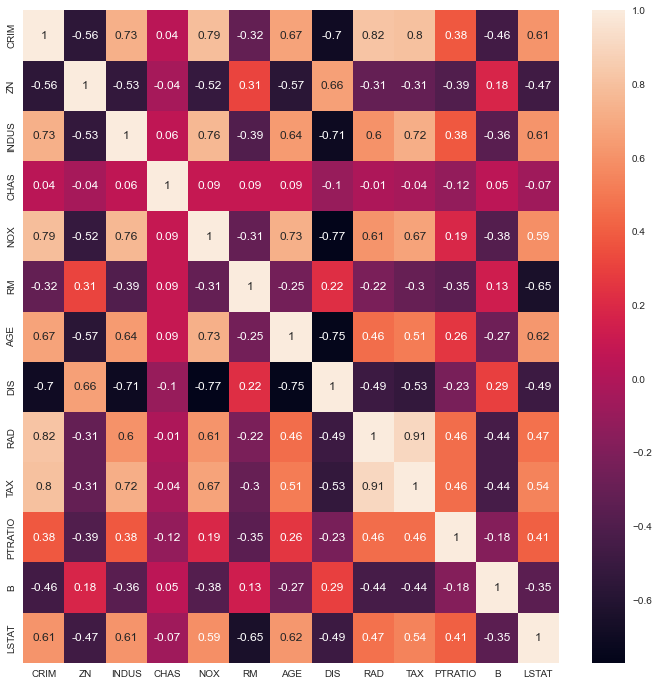

In [74]:
correlation_matrix = boston[features].corr().round(2)
figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True)

On the x and y axis of the heatmap we have the variables of the boston house dataframe. Within each square, the correlation value between those 2 variables is indicated. For example, for LSTAT vs CRIM at the bottom left of the heatmap, we see a correlation of 0.46. These 2 variables are not highly correlated.

Instead, for the variables RAD and TAX (try and find them in the plot), the correlation is 0.91. These variables are highly correlated. The same is true for the variables NOX and DIS, which show a correlation value of -0.71.

Let's see how they look in a scatter plot.

**Correlation** between **RAD** (index of accessibility to radial highways) and **TAX** (full-value property-tax rate per $10,000)

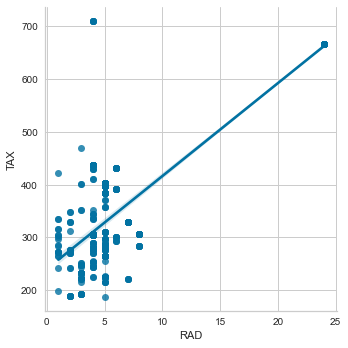

In [75]:
sns.lmplot(x="RAD", y="TAX", data=boston, order=1)

**Correlation** between **NOX** (Nitric oxides conc. (parts/10 million)) and **DIS** (weighted distances to five Boston employment centres)!

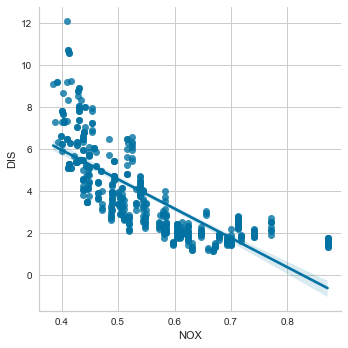

In [76]:
sns.lmplot(x="NOX", y="DIS", data=boston, order=1)

The **correlation, or co-linearity between NOX and DIS, is quite obvious** in the above scatter plot. So these variables are violating the assumption of no multi co-linearity. We can remove 1 of them!